###### Import Library

In [1]:
import numpy as np
import pandas as pd 
import nltk 
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jackheart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Import Dataset

In [2]:
df = pd.read_csv('sqli (1).csv', encoding='utf-16')
df.dropna(inplace=True)

In [3]:
print('Label 0: ', len(df[df.Label==0]))
print('Label 1: ', len(df[df.Label==1]))

Label 0:  3060
Label 1:  1127


In [4]:
df[df.Label==0]

,Sentence,Label
1128,Add plain text Ne te quaesiveris extra,0
1129,"Man star; soul Render honest perfect man, Com...",0
1130,"Our acts angels are, good ill, Our fatal shad...",0
1131,Epilogue Beaumont Fletcher’s Honest Man’s For...,0
1132,I read day verses written eminent painter ori...,0
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


###### Preprocessor

In [5]:
temp = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
t1 = temp.fit_transform(df['Sentence'].values.astype('U')).toarray()
vocabulary = temp.get_feature_names()
vectorizer = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english'), vocabulary=vocabulary)

In [6]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [7]:
X = pd.DataFrame(vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray())
y = df.Label

###### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3349, 4716), (838, 4716), (3349,), (838,))

###### Naive Bayes

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
pickle.dump(model, open('model.pkl', 'wb'))

In [11]:
pickle.dump(model, open('model.pkl', 'wb'))

###### Evaluation

In [12]:
print('Train Result')
print(classification_report(y_train, model.predict(X_train)))
print('Test Result')
print(classification_report(y_test, model.predict(X_test)))

Train Result
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2448
           1       0.94      1.00      0.97       901

    accuracy                           0.98      3349
   macro avg       0.97      0.99      0.98      3349
weighted avg       0.98      0.98      0.98      3349

Test Result
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       612
           1       0.90      1.00      0.95       226

    accuracy                           0.97       838
   macro avg       0.95      0.98      0.96       838
weighted avg       0.97      0.97      0.97       838



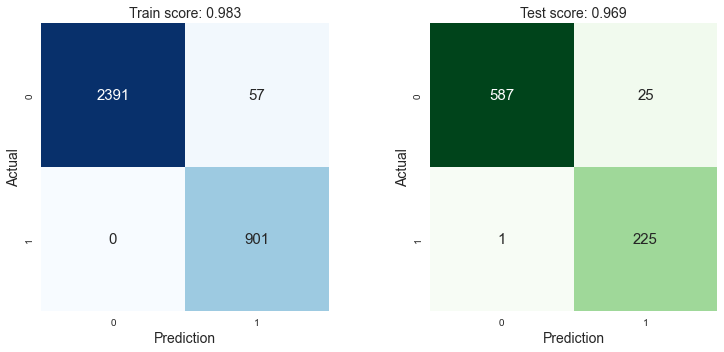

In [13]:
plt.figure(figsize=(11, 5))
plt.subplot(121)
labels = y_train.unique()
cm = confusion_matrix(y_train, model.predict(X_train), labels=labels)
sns.heatmap(cm, annot=True, square=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels,
        fmt="d", annot_kws={"fontsize": 15})
plt.title(f'Train score: {accuracy_score(y_train, model.predict(X_train)):.3f}', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=90, verticalalignment='center')

plt.subplot(122)
labels = y_test.unique()
cm = confusion_matrix(y_test, model.predict(X_test), labels=labels)
sns.heatmap(cm, annot=True, square=True, cmap='Greens', cbar=False, xticklabels=labels, yticklabels=labels,
        fmt="d", annot_kws={"fontsize": 15})
plt.title(f'Test score: {accuracy_score(y_test, model.predict(X_test)):.3f}', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=90, verticalalignment='center');
plt.tight_layout()
plt.show()